<h2 style="color:green" align="center"> CAR PRICE PREDICTION using LINEAR REGRESSION </h2>

<b> Problem Statement </b>

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

<b> Business Goal </b>

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

<b> Desciption of dataset </b>

Here is a brief description of the columns in the car price detection dataset:

- `symboling`: This column represents the insurance risk rating of the car. A value of +3 indicates that the car is risky, while -3 indicates that it is probably pretty safe.
- `fueltype`: This column indicates the type of fuel used by the car (e.g., gas or diesel).
- `CompanyName`: This column represents the name of the company that manufactured the car.
- `aspiration`: This column indicates whether the car has a standard or turbo aspiration.
- `doornumber`: This column represents the number of doors on the car (e.g., two or four).
- `carbody`: This column indicates the body style of the car (e.g., sedan, hatchback, wagon, etc.).
- `drivewheel`: This column represents the type of drive wheel system used by the car (e.g., front-wheel drive, rear-wheel drive, etc.).
- `enginelocation`: This column indicates where the engine is located in the car (e.g., front or rear).
- `wheelbase`: This column represents the distance between the front and rear wheels of the car.
- `carlength`: This column represents the length of the car.
- `carwidth`: This column represents the width of the car.
- `carheight`: This column represents the height of the car.
- `curbweight`: This column represents the weight of the car without any passengers or cargo.
- `enginetype`: This column indicates the type of engine used by the car (e.g., dohc, ohcv, ohc, etc.).
- `cylindernumber`: This column represents the number of cylinders in the car's engine.
- `enginesize`: This column represents the size of the car's engine.
- `fuelsystem`: This column indicates the type of fuel system used by the car (e.g., mpfi, 2bbl, idi, etc.).
- `boreratio`: This column represents the bore ratio of the car's engine.
- `stroke`: This column represents the stroke of the car's engine.
- `compressionratio`: This column represents the compression ratio of the car's engine.
- `horsepower`: This column represents the horsepower produced by the car's engine.
- `peakrpm`: This column represents the maximum revolutions per minute (RPM) that can be achieved by the car's engine.
- `citympg`: This column represents how many miles per gallon (MPG) a car can travel in city conditions.
- `highwaympg`: This column represents how many miles per gallon (MPG) a car can travel on highways.
- `price`: This column represents how much a particular model costs.


<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read Data
import numpy as np                     # For doing Numerical caluculation like mean, std, mode etc.,
import pandas as pd                    # for loading, reading and manipulation the data

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                                                          # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Loading dataset </h2>

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
print(f'First 5 rows \n\n{df.head()}')
print(f'Last 5 rows \n\n{df.tail()}')

First 5 rows 

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  pea

In [3]:
# checking dimension (num of rows and columns) of dataset
print("data shape (Rows, Columns):",df.shape)

data shape (Rows, Columns): (205, 26)


In [4]:
#information about tha dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features


<b> 1. Find Unwanted Columns </b>

`car_ID` is unique for every car, so no use of keeping it, Hence droping it

In [5]:
df.drop(['car_ID'],inplace = True, axis=1)

<b> 2. Find Missing Values </b>

In [6]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

dataset doesnot contains any missing values

<b> 3. Explore categorical Features </b>

In [7]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
categorical_features

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [8]:
df['CarName'].nunique()

147

In [9]:
#Splitting the car and company name in the CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3, 'CompanyName', CompanyName)
df.drop(['CarName'], inplace=True, axis=1)
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Fixing invalid values

There seems to be some spelling error in the CompanyName column.

`maxda` = `mazda`

`Nissan` = `nissan`

`porsche` = `porcshce`

`toyota` = `toyouta`

`vokswagen` = `volkswagen` = `vw`

In [11]:
#Lowering the all company names
df['CompanyName'] = df['CompanyName'].str.lower()

In [12]:
#Defining a function that can replace old name with new name
def replace_name(a,b):
    df['CompanyName'].replace(a,b, inplace=True)

In [13]:
#calling the function to replace corrceted values
replace_name('maxda','mazda')
replace_name('porsche','porcshce')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vk','volkswagen')

df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
df['CompanyName'].nunique()

23

In [15]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
categorical_features

['fueltype',
 'CompanyName',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

<b>4. Find Categorical Feature Distribution </b>

box or violin plot

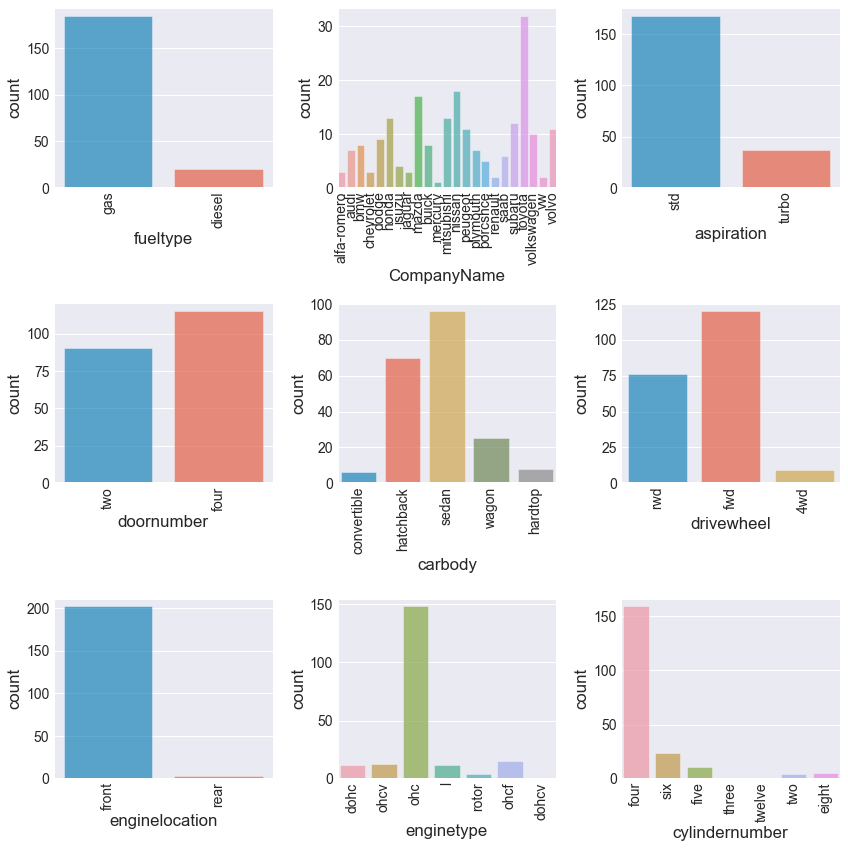

In [16]:
fig, axes = plt.subplots(round(len(categorical_features) / 3), 3, figsize=(12,12))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_features):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=categorical_features[i], alpha=0.7, data=df, ax=ax)

fig.tight_layout()

<b> 5. Relationship between Categorical Features and Label </b>

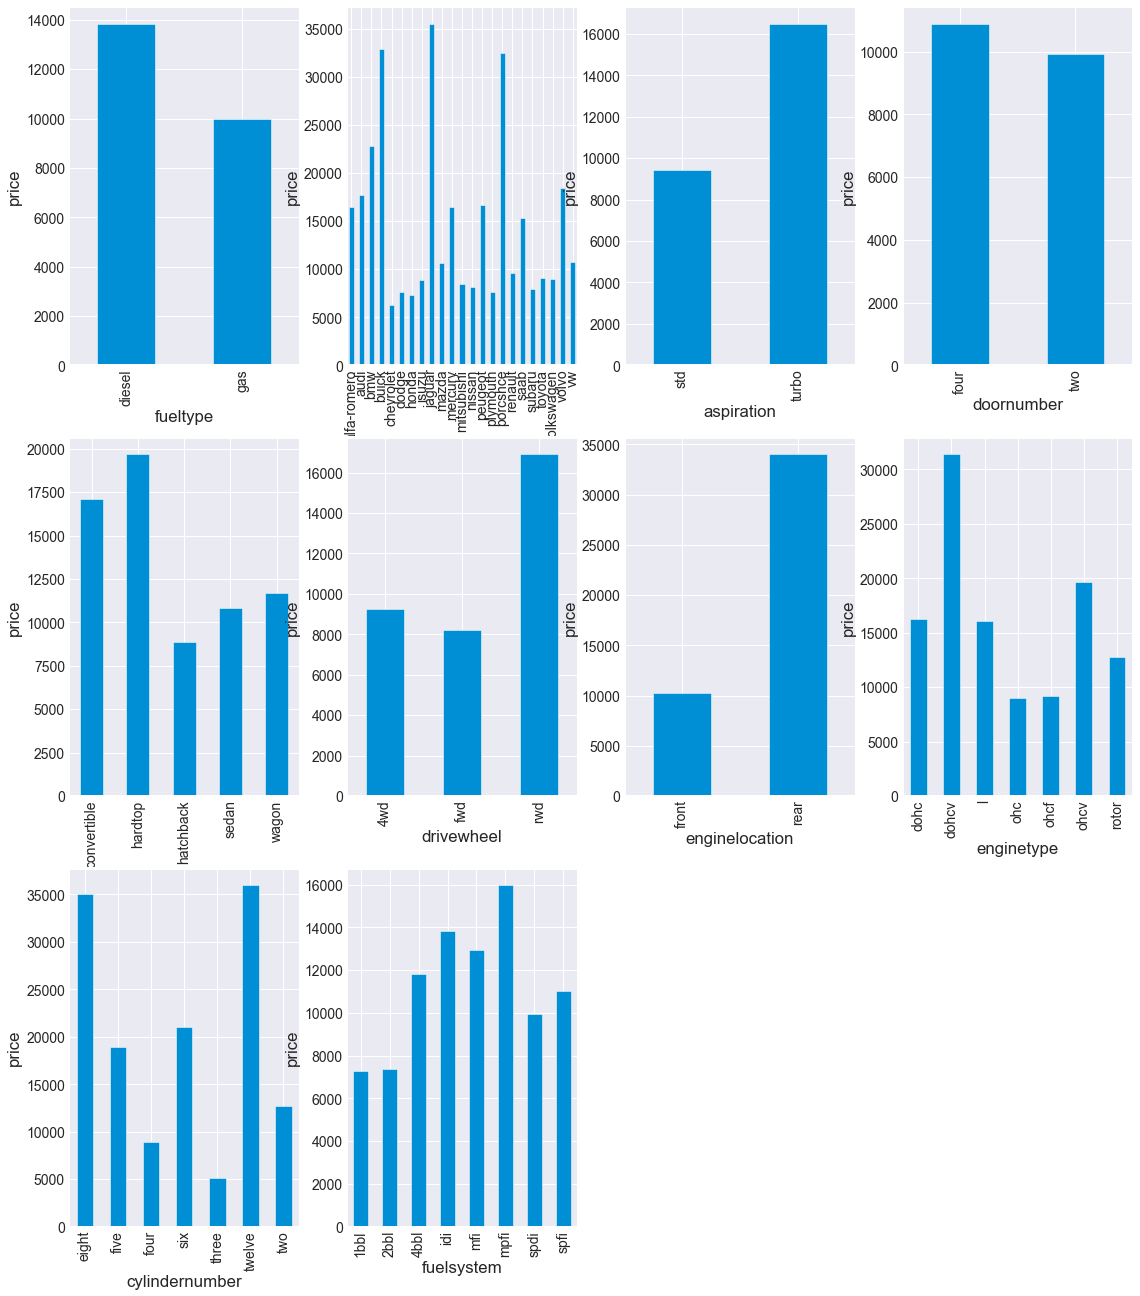

In [17]:
# Find out the relationship between categorical variable and dependent varaible
plt.figure(figsize=(17,80), facecolor='white')
plotnumber =1
for feature in categorical_features:
    ax = plt.subplot(11,4,plotnumber)
    data=df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    #plt.title(feature)
    plotnumber+=1
plt.show()

<b> 6. Explore Numerical Features </b>

In [18]:
numerical_features = df.select_dtypes(exclude='object')
numerical_features

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


<b>7. Find Discrete Numerical Features</b>

In [19]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [20]:
discrete_feature

['symboling', 'peakrpm']

<AxesSubplot:ylabel='Frequency'>

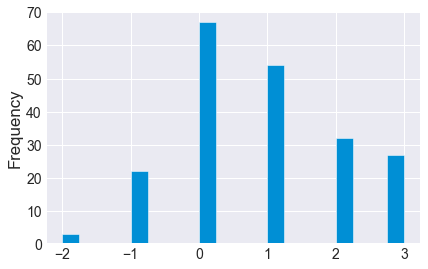

In [21]:
df['symboling'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

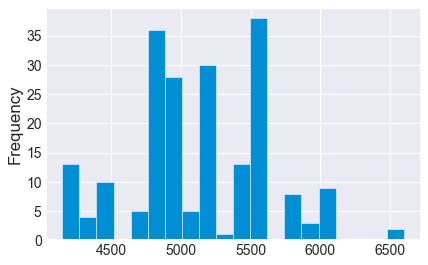

In [22]:
df['peakrpm'].plot(kind='hist',bins=20)

<b>8. Find Continous Numerical Features</b>

In [23]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['Cover_Type']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 13


<b>9. Distribution of Continous Numerical Features</b>

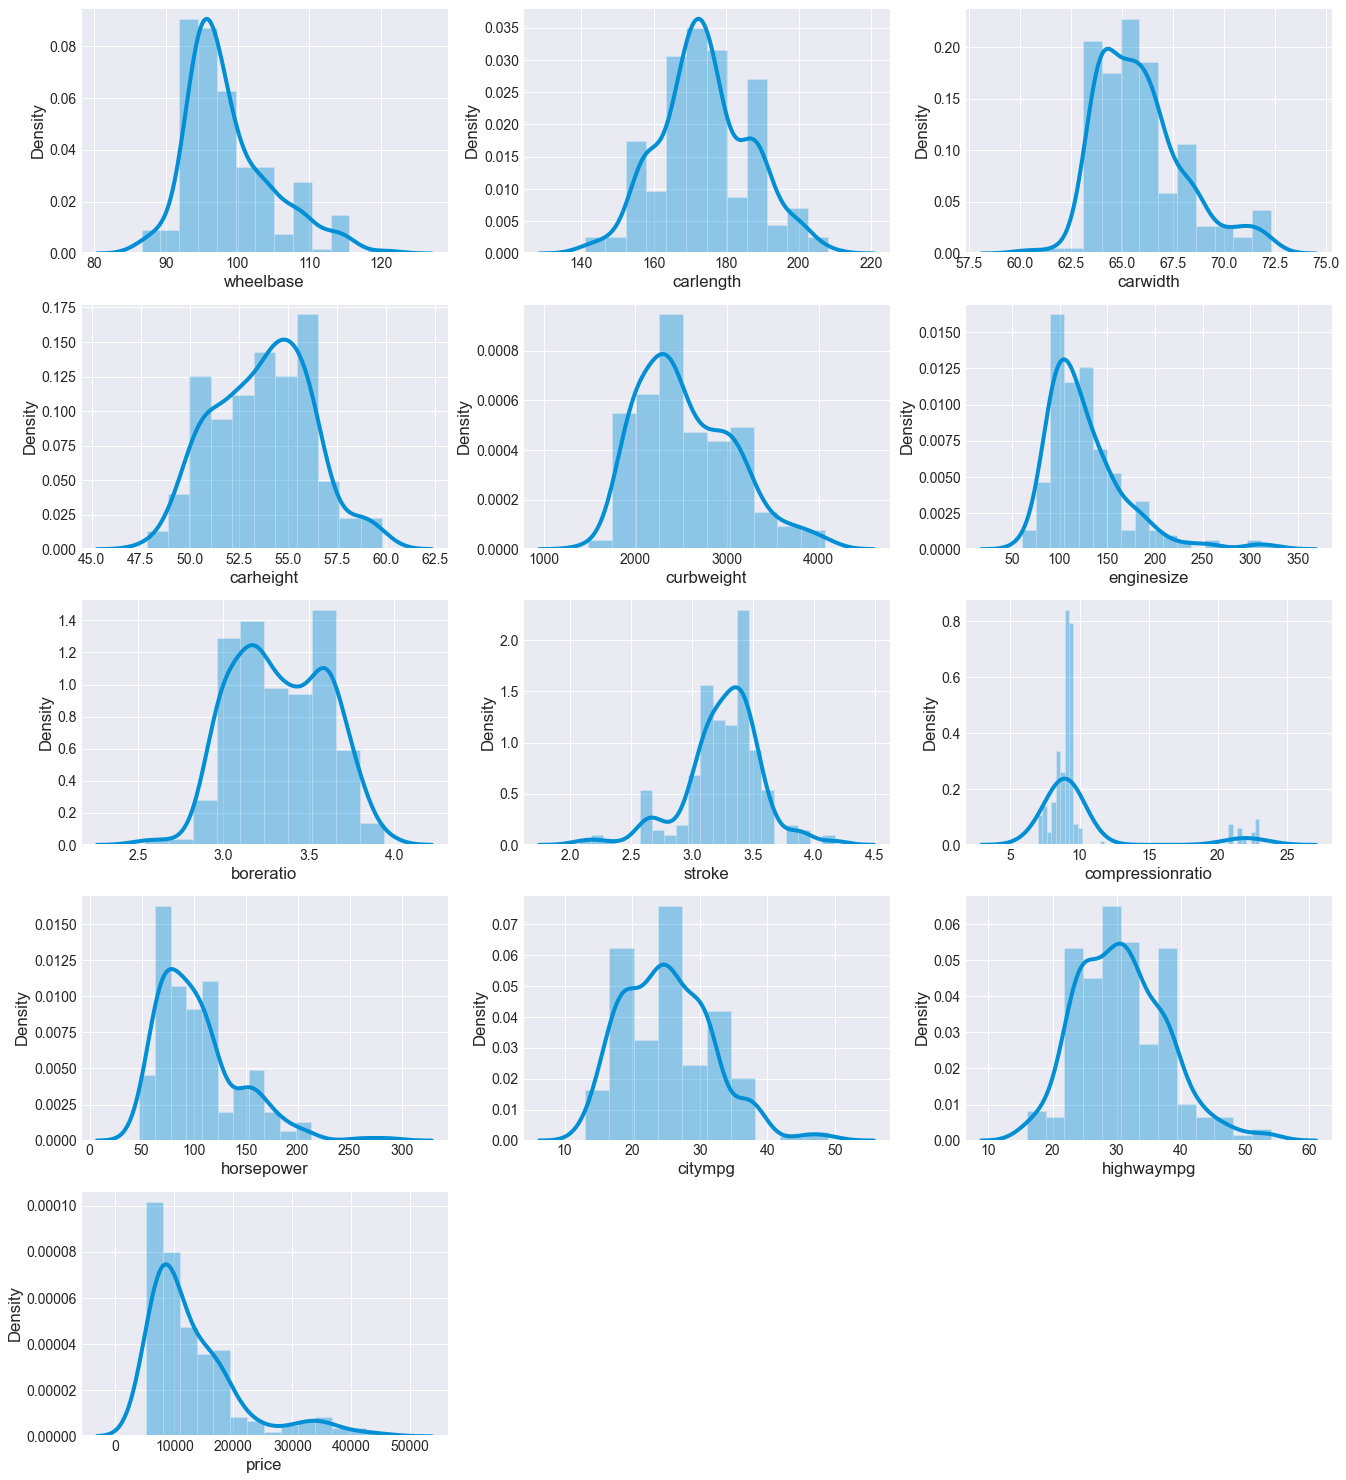

In [24]:
# plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

<b> 10. Relation between Continous numerical Features and Labels </b>

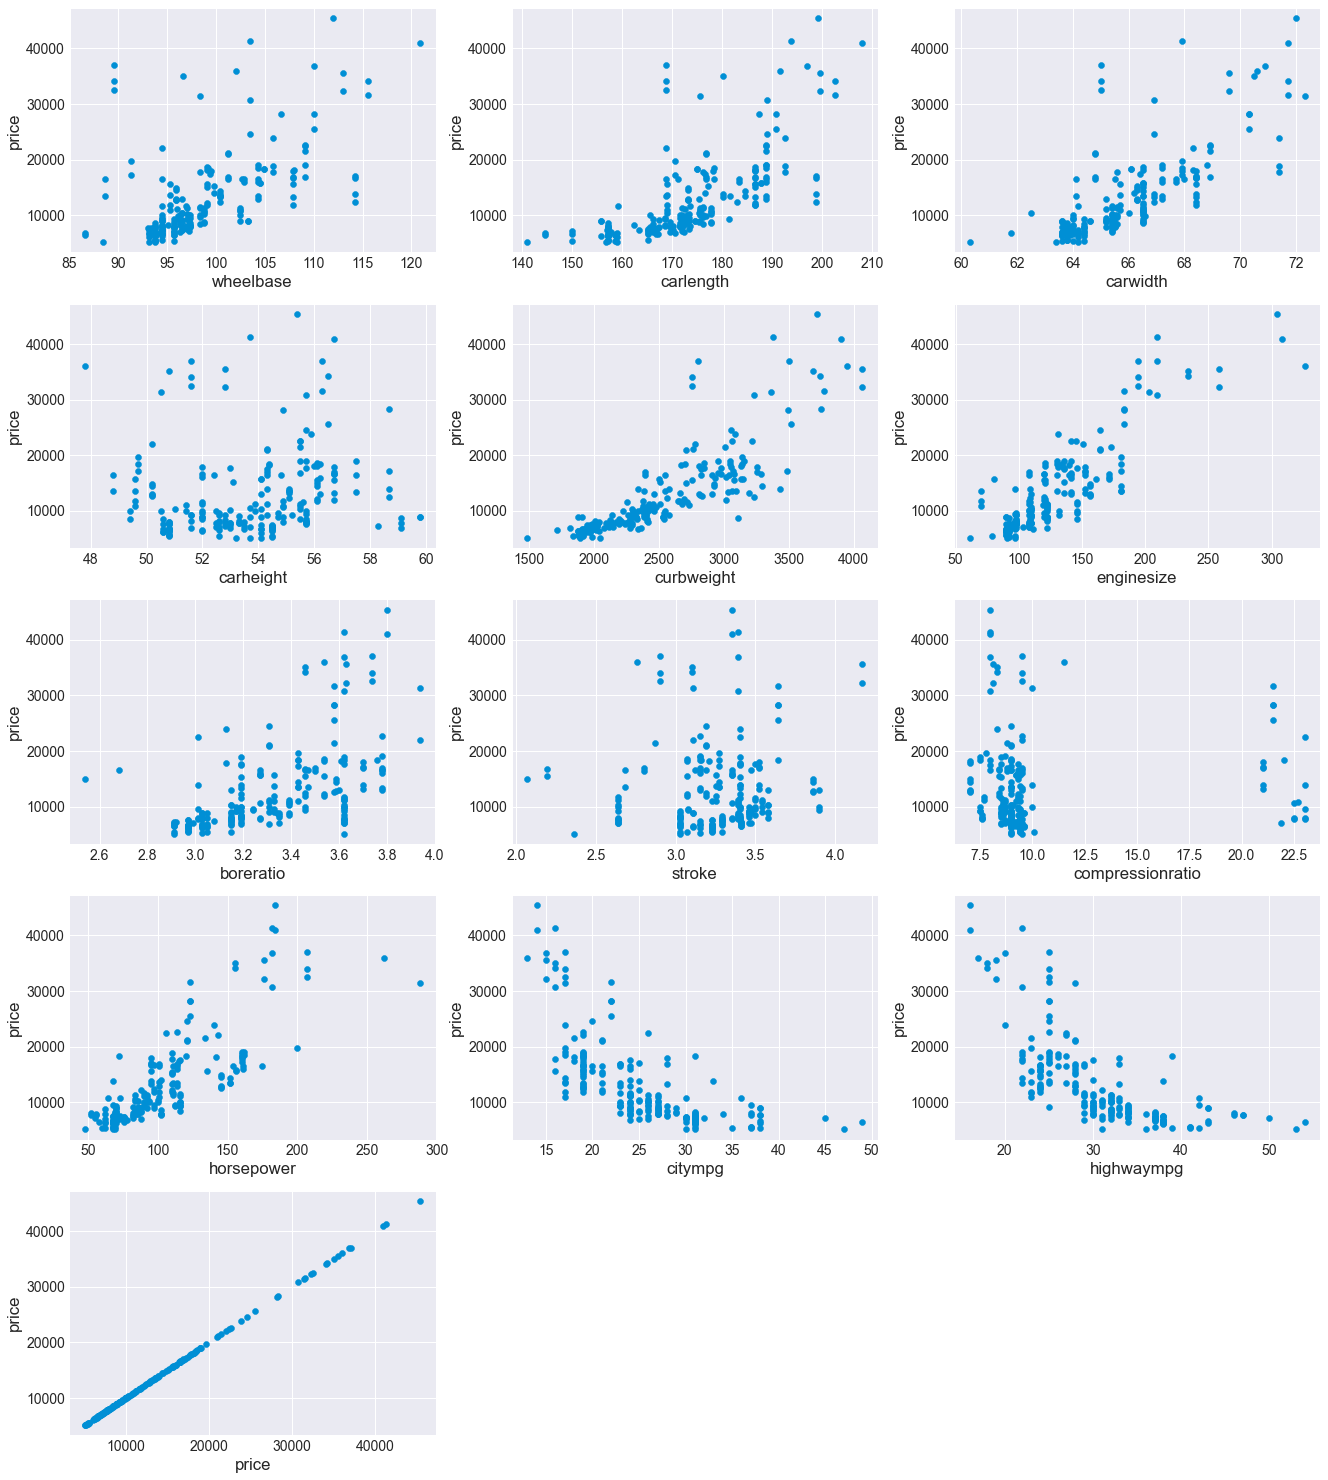

In [25]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    #plt.title(feature)
    plotnumber+=1
plt.show()

<b> 11. Find Outliers in numerical features </b>

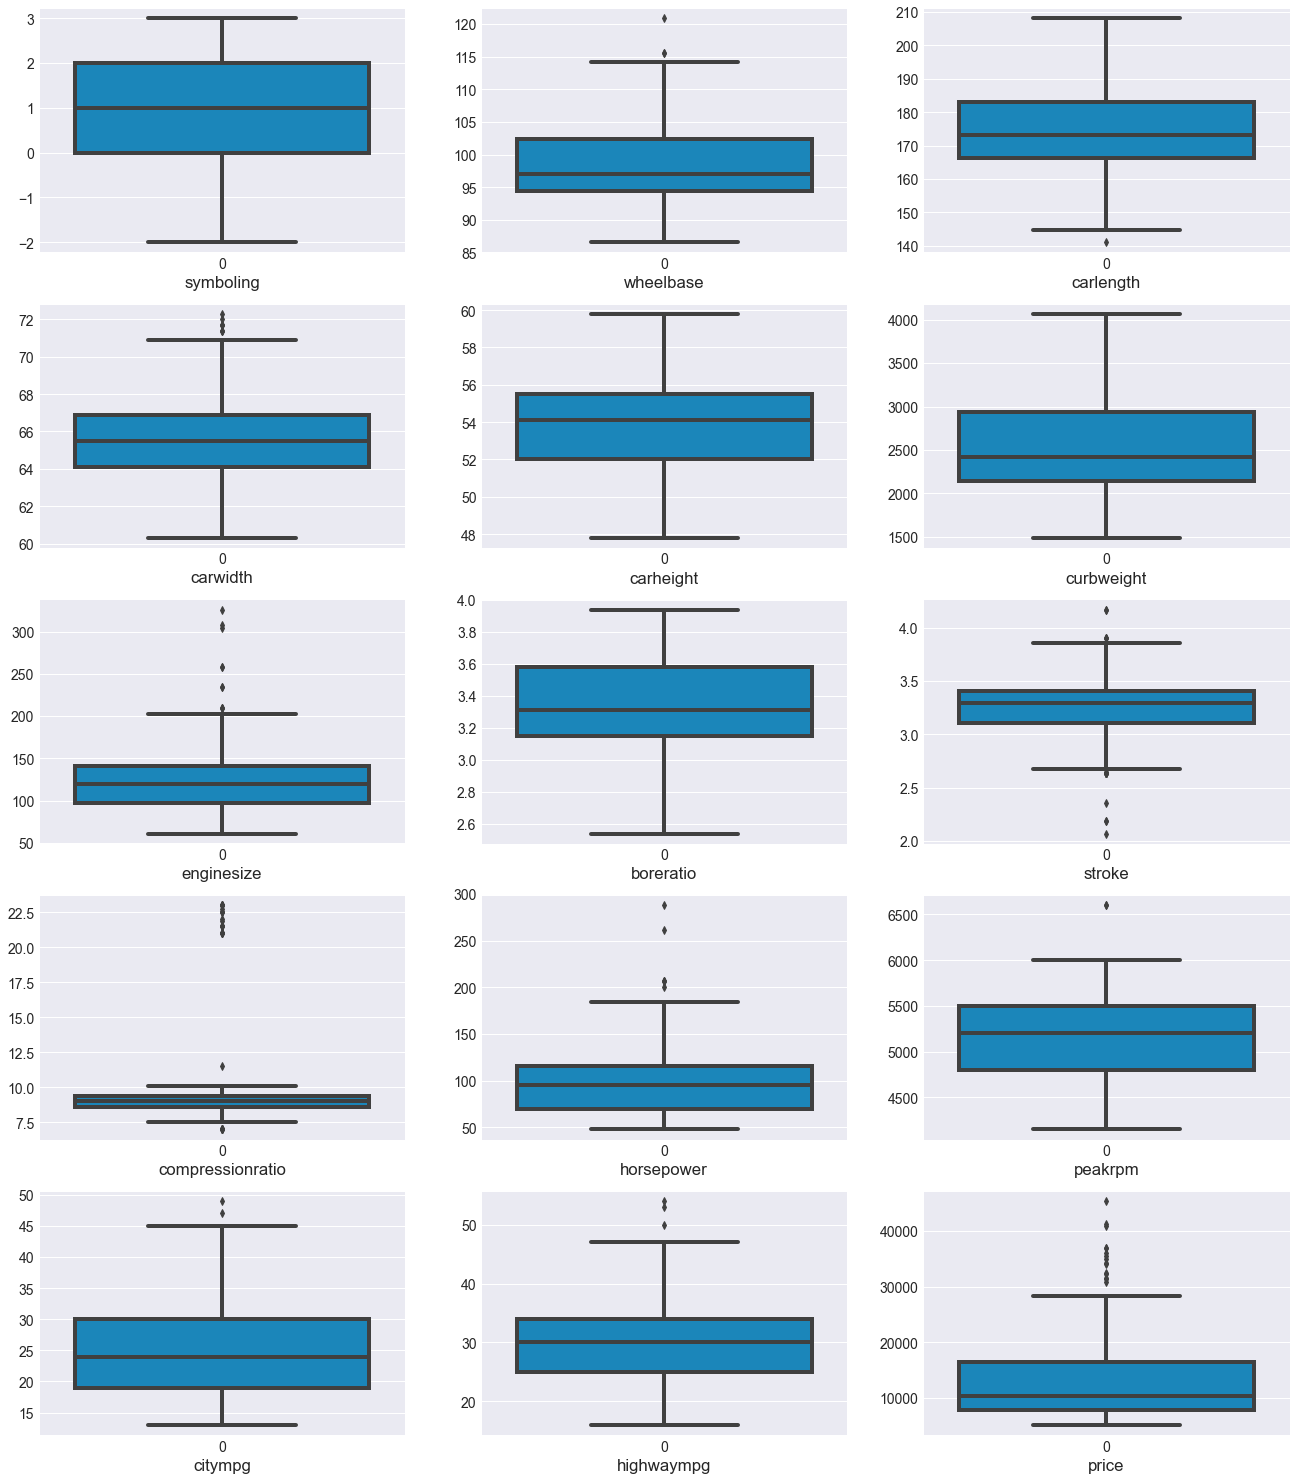

In [26]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<h2 style="color:blue" align="left"> 4. Descriptive Statistics  </h2>

In [27]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


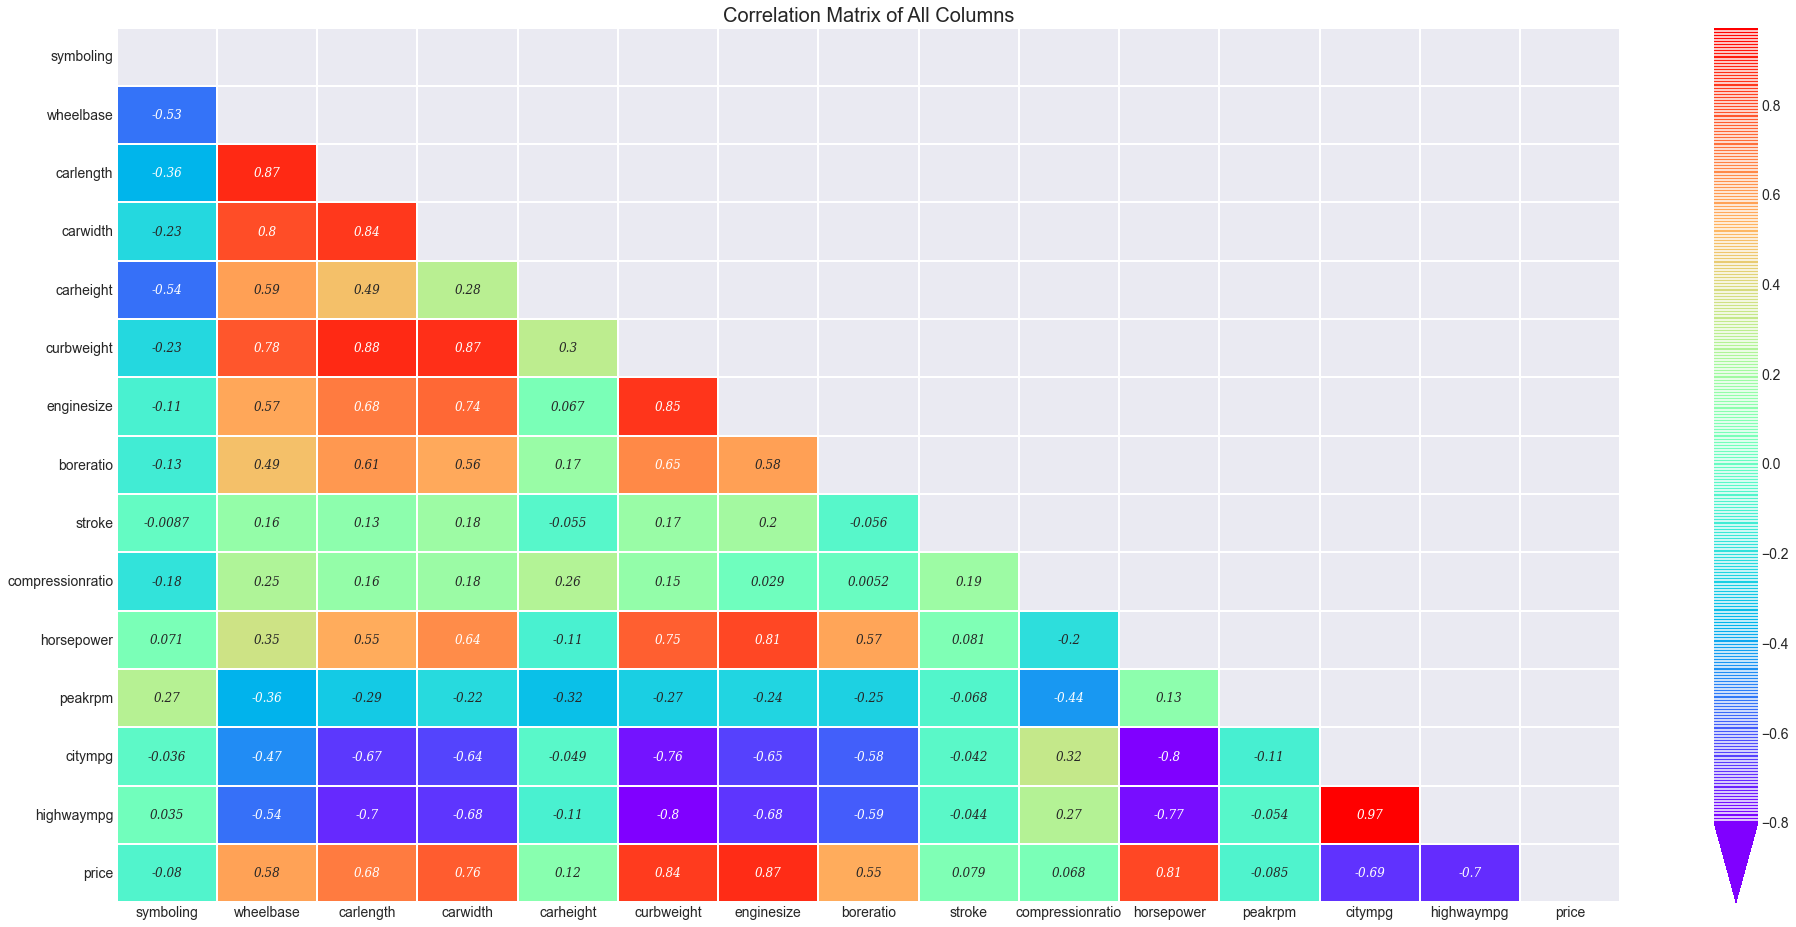

In [29]:
# Define the figure size
plt.figure(figsize = (30,15))

# Cutomize the annot
annot_kws={'fontsize':12,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of All Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

<h2 style="color:blue" align="left"> 5. Data Visualization </h2>

### 1. Categorical

- Categorical data :

     1. Numerical Summaries
     2. Histograms
     3. Pie Charts

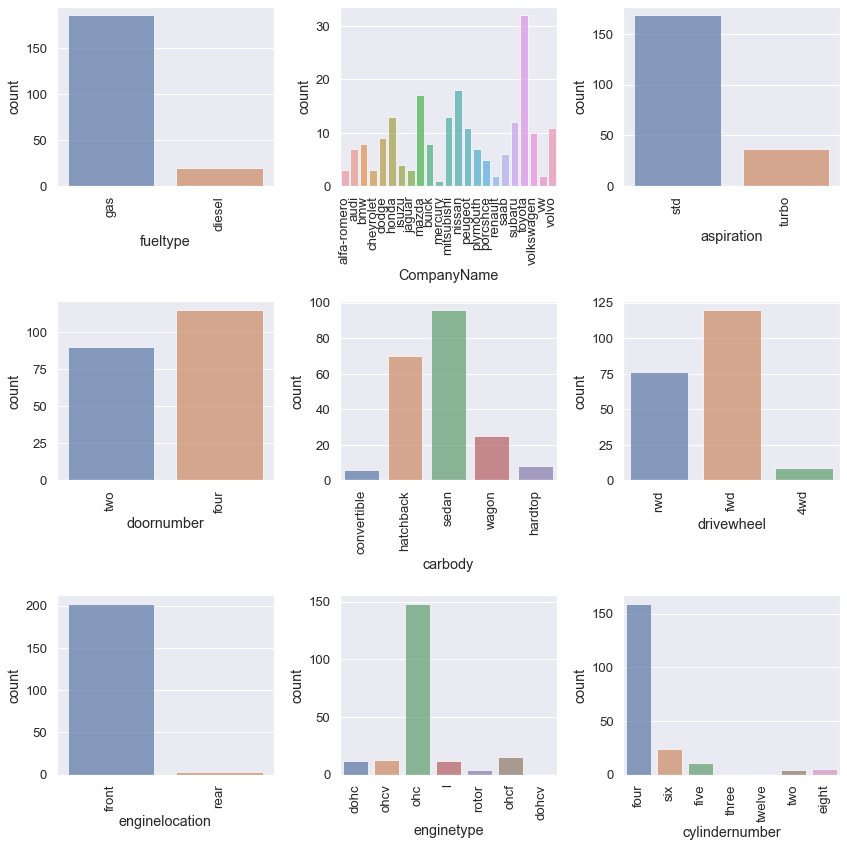

In [30]:
fig, axes = plt.subplots(round(len(categorical_features) / 3), 3, figsize=(12,12))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_features):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=categorical_features[i], alpha=0.7, data=df, ax=ax)

fig.tight_layout()

### 2. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.

     1. Line Plots / Bar Charts
     2. Histograms
     3. Box Plots 
     4. Count Plots
     5. Descriptive Statistics techniques
     6. Violin Plot

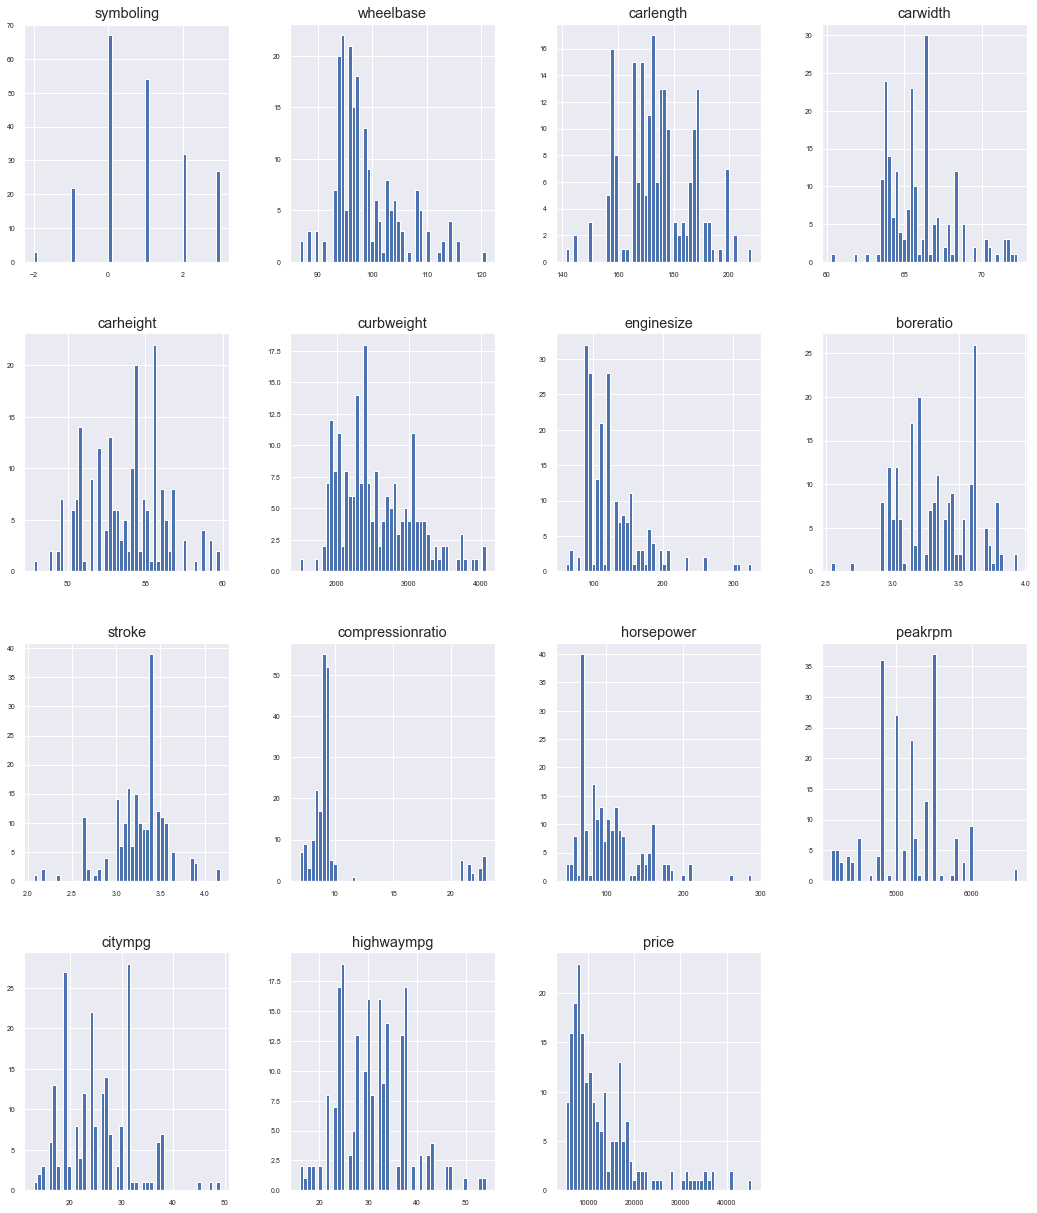

In [31]:
# Histogram for "Numerical Features in dataset"
numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=7, ylabelsize=7)
plt.show()

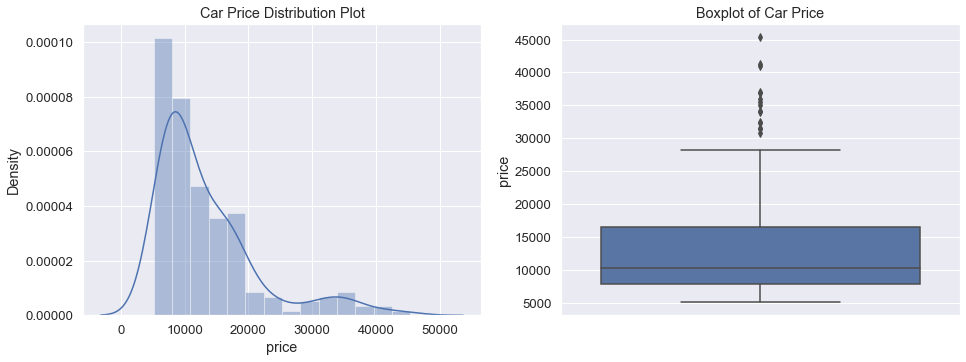

In [32]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.title('Car Price Distribution Plot')

plt.subplot(1,2,2)
sns.boxplot(y=df['price'])
plt.title('Boxplot of Car Price')

plt.show()

In [33]:
df['price'].describe(percentiles =[0.10, 0.25, 0.5, 0.75, 0.85, 0.90, 0.95])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
10%       6657.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
95%      32472.400000
max      45400.000000
Name: price, dtype: float64

<b>Inference:</b>

- The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the  prices   are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)


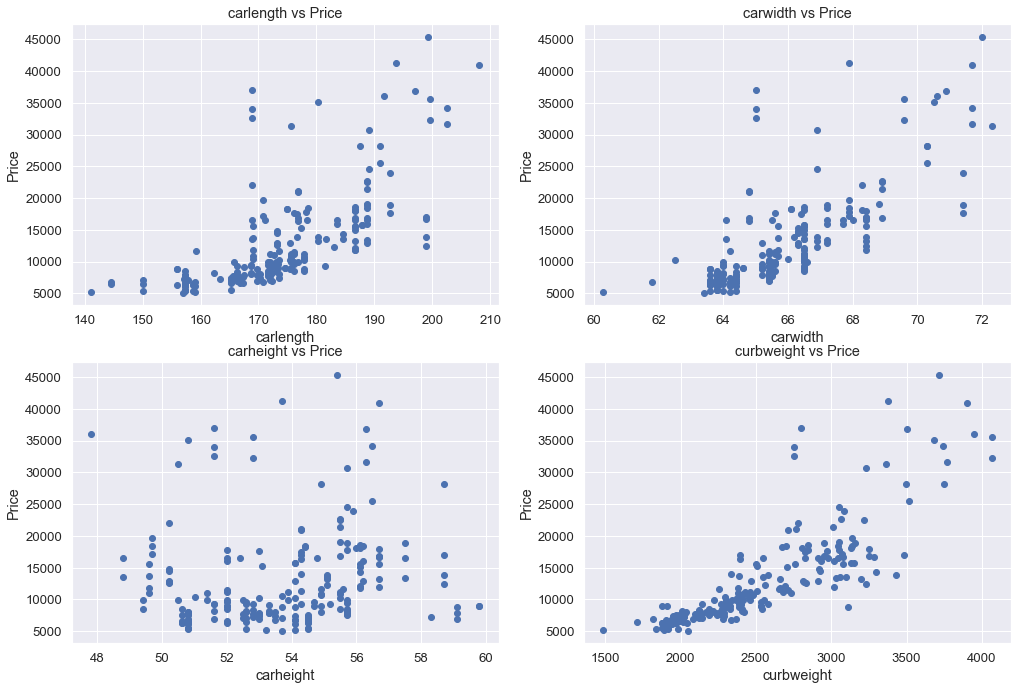

In [34]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.xlabel(x)
    plt.ylabel('Price')
    
plt.figure(figsize=(15,28))

scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)

<b>Inference:</b>

- `carlength`, `cardwidth` and `carweight` shows positive correlation with price .
- `carheight` doesn't show any significant trend with price.

### 3. Bivariate Analysis

- **Bivariate Analysis** : data involves **two different variables**.

     1. Bar Charts
     2. Scatter Plots
     3. FacetGrid
     

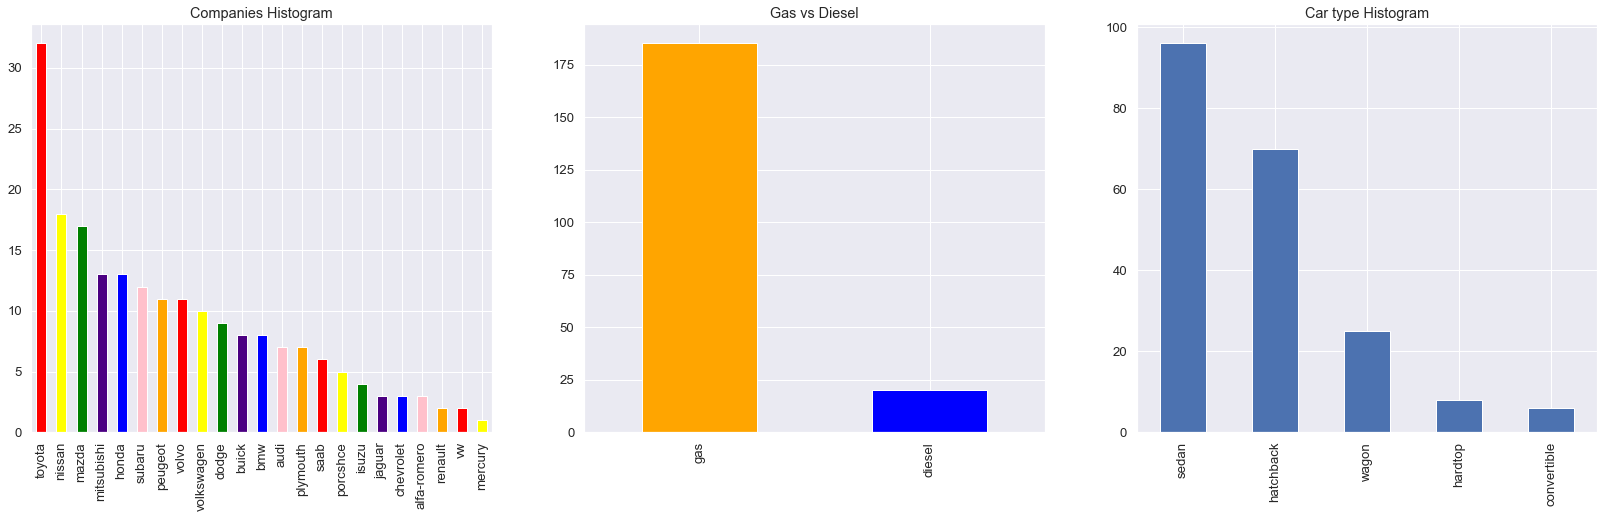

In [35]:
fig,ax = plt.subplots(1,3,figsize=(25,7))

colors = ['red','yellow','green','indigo','blue','pink','orange']
df['CompanyName'].value_counts().plot(kind='bar', color=colors, ax=ax[0])
ax[0].set_title('Companies Histogram')

df['fueltype'].value_counts().plot(kind='bar',color=['orange','blue'], ax=ax[1])
ax[1].set_title('Gas vs Diesel')

df['carbody'].value_counts().plot(kind='bar', ax=ax[2])
ax[2].set_title('Car type Histogram')

plt.show()

<b>Inference:</b>

- `Toyota` seemed to be favored car company.
- Number of gas fueled cars are more than diesel.
- `sedan` is the top car type prefered.

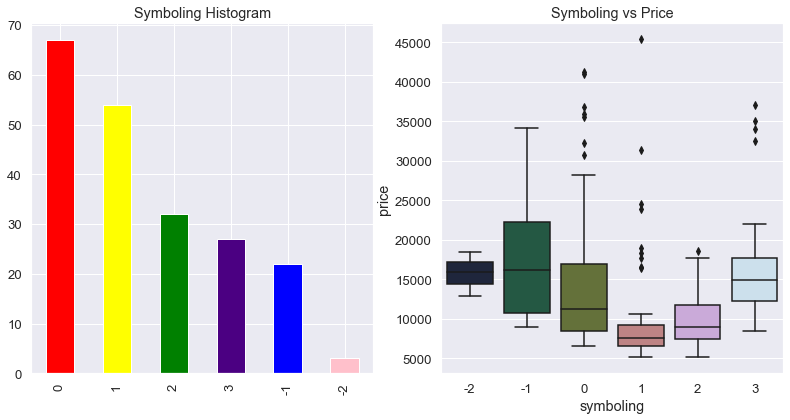

In [36]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
df['symboling'].value_counts().plot(kind='bar',color=colors)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

<b>Inference:</b>

- `0` and `1` seemed to be favored car symbol.
- The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

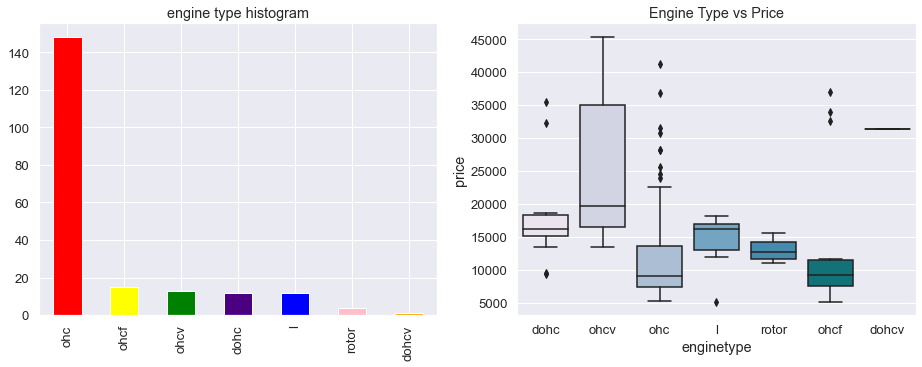

In [37]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
df['enginetype'].value_counts().plot(kind='bar',color=colors)
plt.title('engine type histogram')

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

<b>Inference:</b>

- `ohc` Engine type seems to be most favored type.
- `ohcv` has the highest price range (While `dohcv` has only one row), `ohc` and `ohcf` have the low price range.

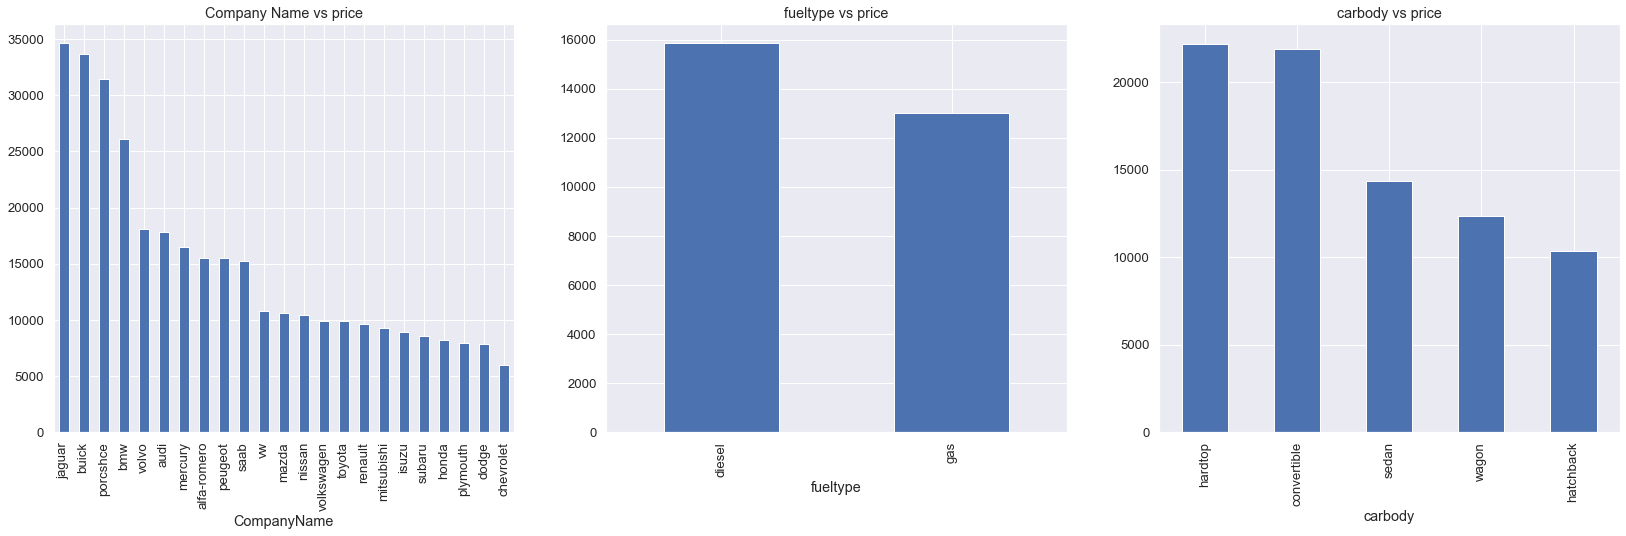

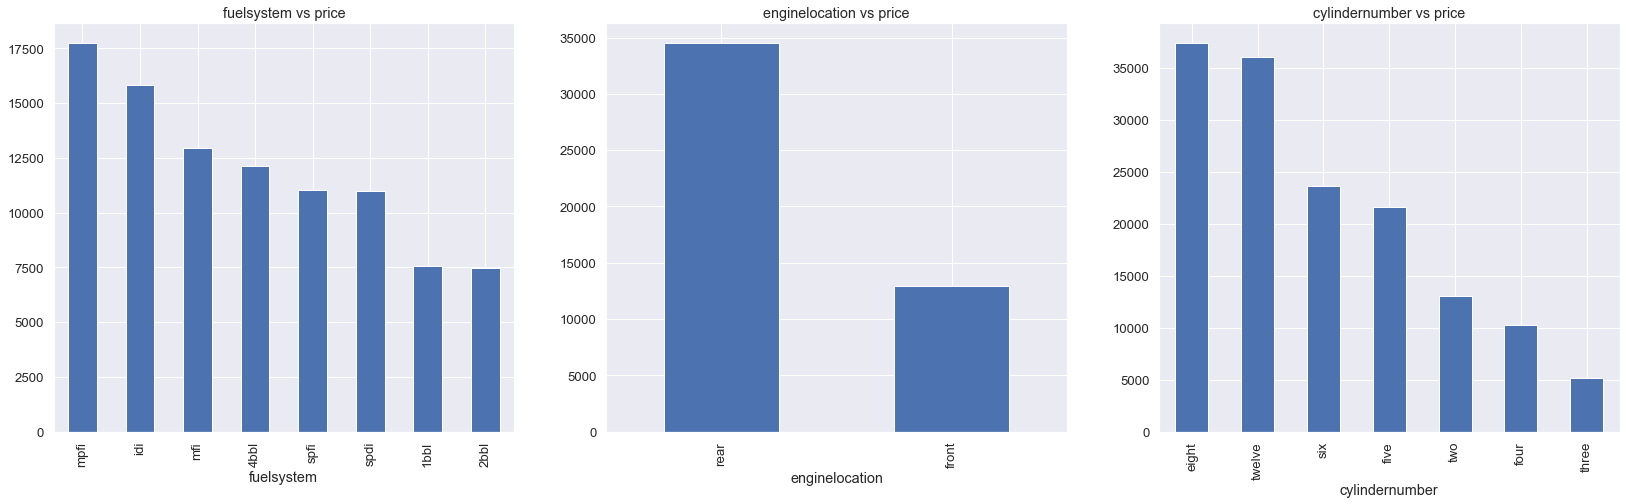

In [38]:
plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('Company Name vs price')

plt.subplot(1,3,2)
df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('fueltype vs price')

plt.subplot(1,3,3)
df.groupby(['carbody'])['price'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('carbody vs price')

plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
df.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('fuelsystem vs price')

plt.subplot(1,3,2)
df.groupby(['enginelocation'])['price'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('enginelocation vs price')

plt.subplot(1,3,3)
df.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('cylindernumber vs price')

plt.show()


<b>Inference:</b>

- `jaguar`,`buick`,`porcshce` and `bmw` are most expensive cars respectively.
- diesel cars have higher average price than gas cars.
- hardtop and convertible have higher average price.
- `mpfi` and `idi` are expensive from other fuel systems.
- `rear` are most expensive and popular than `front`
- `eight` and `twelve` cylinder cards are most expensive.

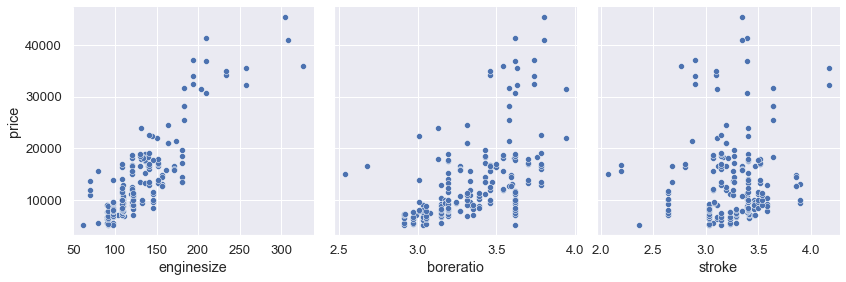

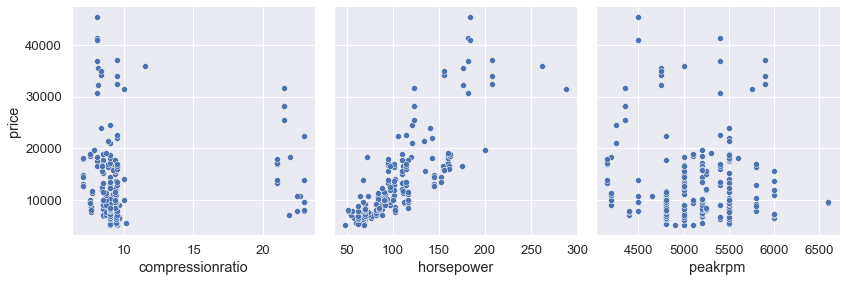

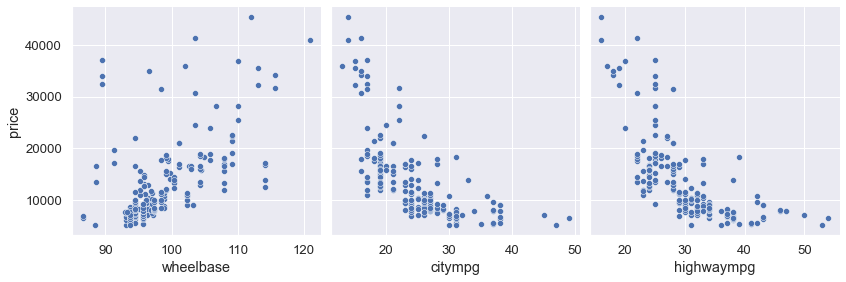

In [39]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

<b>Inference:</b>

- `enginesize`, `boreratio`, `horsepower`, `wheelbase` - seem to have a significant positive correlation with price.
- `citympg`, `highwaympg` - seem to have a significant negative correlation with price

### 3. Multivariate Analysis

- **Multivariate Analysis** : data involves **multiple different variables**.

     1. Pair Charts

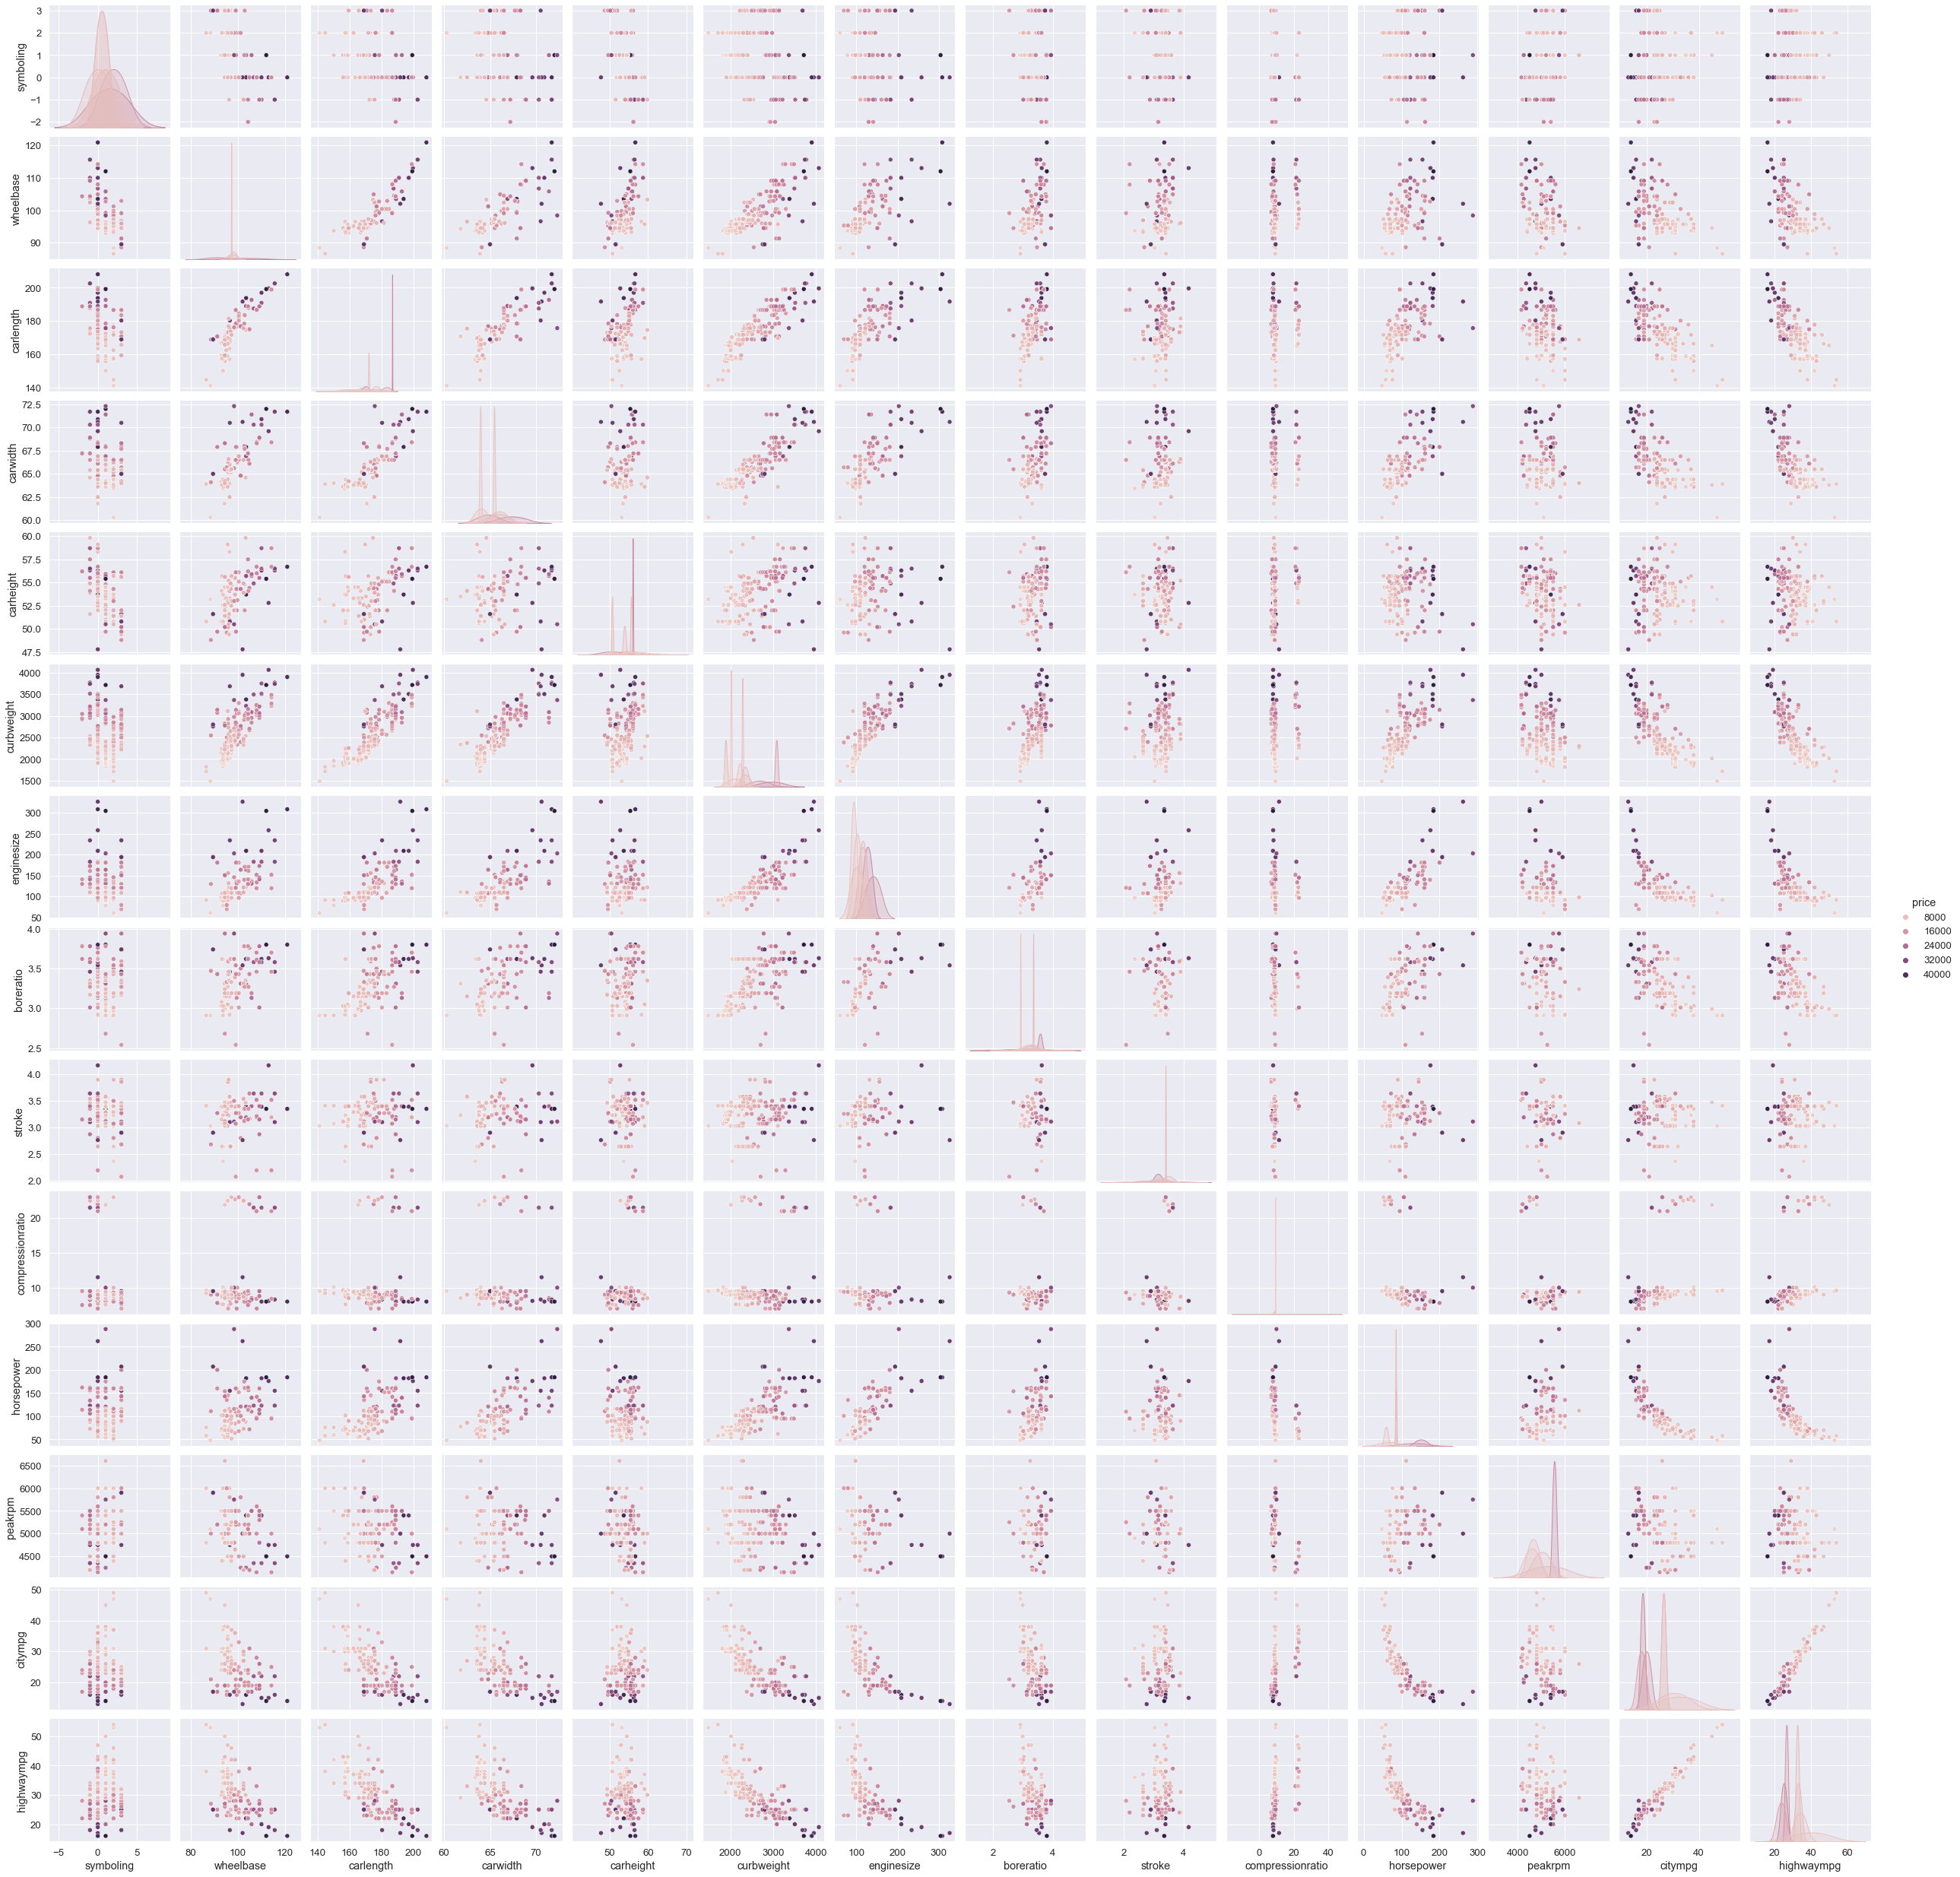

In [40]:
sns.pairplot(df, hue='price')
plt.show()

<h2 style="color:blue" align="left"> 6. Feature Engineering </h2>

The relation between citympg and highwaympg in fuel economy is used to calculate the combined MPG value, which is the most prominent for the purpose of quick and easy comparison across vehicles. 
The combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45% 

In [41]:
#Fuel economy
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [42]:
#Binning the Car Companies based on avg prices of each Company.
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [43]:
df.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueleconomy', 'carsrange'],
      dtype='object')

In [44]:
cars_lr = df[['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueleconomy', 'carsrange']]
cars_lr.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [45]:
cars_lr = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [46]:
cars_lr[['fueltype', 'aspiration','carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'carsrange']]

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,carsrange
0,gas,std,convertible,rwd,dohc,four,Medium
1,gas,std,convertible,rwd,dohc,four,Medium
2,gas,std,hatchback,rwd,ohcv,six,Medium
3,gas,std,sedan,fwd,ohc,four,Medium
4,gas,std,sedan,4wd,ohc,five,Medium
...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,ohc,four,Medium
201,gas,turbo,sedan,rwd,ohc,four,Medium
202,gas,std,sedan,rwd,ohcv,six,Medium
203,diesel,turbo,sedan,rwd,ohc,six,Medium


In [47]:
a = pd.get_dummies(cars_lr[['fueltype', 'aspiration','carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'carsrange']], drop_first =True)
cars_lr = pd.concat([cars_lr,a], axis=1)
cars_lr.drop(cars_lr[['fueltype', 'aspiration','carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'carsrange']], axis=1, inplace=True)
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [48]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
122,7609,93.7,2191,98,2.97,68,34.15,167.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0
125,22018,94.5,2778,151,3.94,143,22.60,168.9,68.3,1,...,0,0,0,1,0,0,0,0,0,1
166,9538,94.5,2300,98,3.24,112,27.35,168.7,64.0,1,...,0,0,0,1,0,0,0,0,0,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
199,18950,104.3,3157,130,3.62,162,19.25,188.8,67.2,1,...,0,0,0,1,0,0,0,0,1,0


In [50]:
df_train.shape

(143, 31)

In [51]:
df_test.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
160,7738,95.7,2094,98,3.19,70,42.05,166.3,64.4,1,...,0,0,0,1,0,0,0,0,0,0
186,8495,97.3,2275,109,3.19,85,30.15,171.7,65.5,1,...,0,0,0,1,0,0,0,0,0,0
59,8845,98.8,2385,122,3.39,84,28.70,177.8,66.5,1,...,0,0,0,1,0,0,0,0,1,0
165,9298,94.5,2265,98,3.24,112,27.35,168.7,64.0,1,...,0,0,0,1,0,0,0,0,0,0
140,7603,93.3,2240,108,3.62,73,28.25,157.3,63.8,1,...,0,0,0,1,0,0,0,0,0,0


In [52]:
df_test.shape

(62, 31)

In [53]:
#Scaling the Numerical columns using MixMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [54]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [55]:
#Diving data into X and y
y_train = df_train.pop('price')
X_train = df_train


In [56]:
X_train.shape

(143, 30)

In [58]:
y_train.shape

(143,)

<h2 style="color:blue" align="left"> 7. Building the Model </h2>

In [59]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
#Aplying RFE method to extract top 15 features
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 9),
 ('boreratio', False, 5),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('fueltype_gas', False, 11),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 12),
 ('drivewheel_rwd', False, 10),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 14),
 ('enginetype_ohc', False, 2),
 ('enginetype_ohcf', False, 3),
 ('enginetype_ohcv', False, 4),
 ('enginetype_rotor', False, 16),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 8),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 15),
 ('carsrange_Medium', False, 7),
 ('carsrange_Highend', True, 1)]

In [62]:
#Taking 15 features from RFE method
X_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'carsrange_Highend'],
      dtype='object')

<b> Building model using statsmodel, for the detailed statistics </b>

In [63]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,curbweight,horsepower,fueleconomy,carwidth,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,carsrange_Highend
122,0.244828,0.272692,0.083333,0.530864,0.291667,0,0,1,0,0,0,1,0,0,0
125,0.272414,0.500388,0.395833,0.213992,0.666667,0,1,0,0,0,0,1,0,0,1
166,0.272414,0.314973,0.266667,0.344307,0.308333,0,1,0,0,0,0,1,0,0,0
1,0.068966,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0,1,0,0,0
199,0.610345,0.647401,0.475000,0.122085,0.575000,0,0,0,1,0,0,1,0,0,0


In [64]:
#Defining the functions for OLS method and VIF method
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

<b> Traing the model with OLS method </b>

In [65]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           3.16e-68
Time:                        10:56:07   Log-Likelihood:                 213.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     127   BIC:                            -348.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

In [66]:
#Checking the VIF score of model features
checkVIF(X_train_new)

,Features,VIF
0,const,108.84
8,carbody_sedan,13.72
2,curbweight,12.62
7,carbody_hatchback,11.67
3,horsepower,11.16
5,carwidth,7.92
1,wheelbase,7.11
9,carbody_wagon,6.59
12,cylindernumber_four,5.04
13,cylindernumber_six,4.59


In [76]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

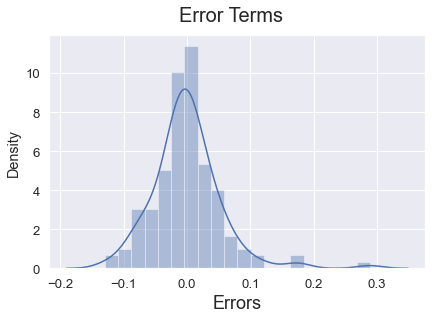

In [77]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

<b> Prediction and evaluation </b>

In [69]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'carsrange_Highend','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [70]:

y_test = df_test.pop('price')
X_test = df_test

In [71]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [72]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [73]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7977913239761085

Text(0, 0.5, 'y_pred')

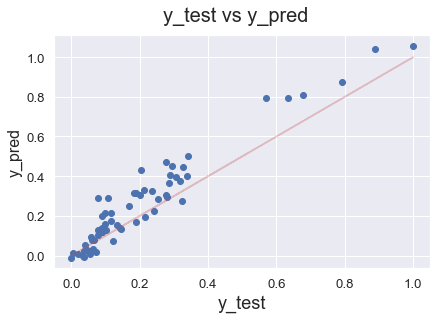

In [74]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.plot(y_train,y_train, alpha=0.3, c='r')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [75]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           3.16e-68
Time:                        10:57:16   Log-Likelihood:                 213.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     127   BIC:                            -348.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

<b> We got R-squared values as 0.933 and adjusted R-square value as 0.926, which is good fir for the model and will yield good predictions </b>